




<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS458 Research Assignment 02 - Part 1
<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div><br>

The CIFAR-10 dataset (Canadian Institute For Advanced Research) is a collection of images that are commonly used to train machine learning and computer vision algorithms. It is one of the most widely used datasets for machine learning research. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 different classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. There are 6,000 images of each class.

<div class="alert alert-block alert-info">
<b>The CIFAR-10 dataset</b><br>
https://www.cs.toronto.edu/~kriz/cifar.html
    </div>

## Import packages needed 

In [1]:
import datetime
import time
import numpy as np
import pandas as pd
from packaging import version
from collections import Counter

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import datetime

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

### Verify TensorFlow Version and Keras Version

In [ ]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.6.0


In [ ]:
print("Keras version: ", keras.__version__)

Keras version:  2.6.0


### Mount Google Drive to Colab Environment

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Functions for Research Assignment

In [4]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(y_test, predictions)))) 

In [5]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

## Loading cifar10 Dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.<br>

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


* Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test).
* x_train, x_test: uint8 arrays of color image data with shapes (num_samples, 32, 32).
* y_train, y_test: uint8 arrays of digit labels (integers in range 0-9)

## EDA Training and Test Datasets

* Imported 50000 examples for training and 10000 examples for test 
* Imported 50000 labels for training and 10000 labels for test 

In [ ]:
print('train_images:\t{}'.format(x_train.shape))
print('train_labels:\t{}'.format(y_train.shape))
print('test_images:\t\t{}'.format(x_test.shape))
print('test_labels:\t\t{}'.format(y_test.shape))

train_images:	(50000, 32, 32, 3)
train_labels:	(50000, 1)
test_images:		(10000, 32, 32, 3)
test_labels:		(10000, 1)


### Review labels for training dataset

In [ ]:
print("First ten labels training dataset:\n {}\n".format(y_train[0:10]))
print("This output the numeric label, need to convert to item description")

First ten labels training dataset:
 [[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]

This output the numeric label, need to convert to item description


### Plot Examples

In [ ]:
def get_three_classes(x, y):
    def indices_of(class_id):
        indices, _ = np.where(y == float(class_id))
        return indices

    indices = np.concatenate([indices_of(0), indices_of(1), indices_of(2)], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [ ]:
(train_images, train_labels),(test_images, test_labels)= tf.keras.datasets.cifar10.load_data()

In [ ]:
x_preview, y_preview = get_three_classes(train_images, train_labels)
x_preview, y_preview = get_three_classes(test_images, test_labels)

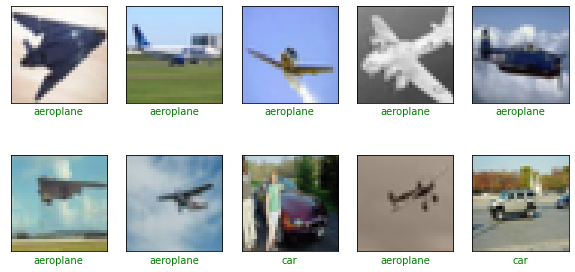

In [ ]:
class_names_preview = ['aeroplane', 'car', 'bird']

def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names_preview[np.argmax(p[i])], color=col)
    plt.show()

show_random_examples(x_preview, y_preview, y_preview)

### Preprocessing Data for Model Development

The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

|Label  |Class_  |
|-------|--------|
|0|	airplane     |
|1|	automobile   |
|2|	bird         |
|3|	cat          |
|4|	deer         |
|5|	dog          |
|6|	frog         |
|7|	horse        |
|8|	ship         |
|9|	truck        |

In [ ]:
class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

### Create Validation Data Set

In [7]:
x_train_split, x_valid_split, y_train_split, y_valid_split = train_test_split(x_train
                                                                              ,y_train
                                                                              ,test_size=.1
                                                                              ,random_state=42
                                                                              ,shuffle=True)

### Confirm Datasets {Train, Validation, Test}

In [ ]:
print(x_train_split.shape, x_valid_split.shape, x_test.shape)

(45000, 32, 32, 3) (5000, 32, 32, 3) (10000, 32, 32, 3)


### Rescale Examples  {Train, Validation, Test}
The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255
 

1. Each element in each example is a pixel value
2. Pixel values range from 0 to 255
3. 0 = black
4. 255 = white

In [8]:
x_train_norm = x_train_split/255
x_valid_norm = x_valid_split/255
x_test_norm = x_test/255

## Create the Model

<img src="https://github.com/djp840/MSDS_458_Public/blob/master/images/CNN_architecture_v4.png?raw=1">


### Build CNN Model

We use a Sequential class defined in Keras to create our model. The first 9 layers Conv2D MaxPooling, Dropout handle feature learning.  The last 3 layers, handle classification

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=384, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 512)        

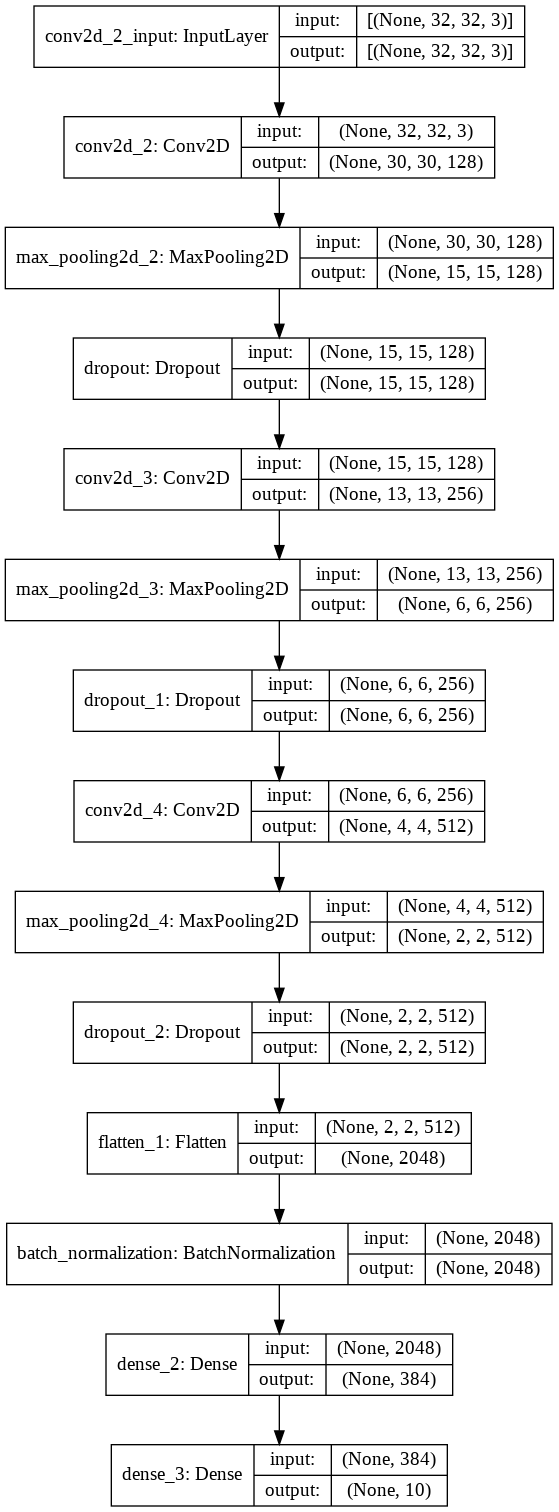

In [33]:
keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

### Compiling the model

In addition to setting up our model architecture, we also need to define which algorithm should the model use in order to optimize the weights and biases as per the given data. We will use stochastic gradient descent.

We also need to define a loss function. Think of this function as the difference between the predicted outputs and the actual outputs given in the dataset. This loss needs to be minimised in order to have a higher model accuracy. That's what the optimization algorithm essentially does - it minimises the loss during model training. For our multi-class classification problem, categorical cross entropy is commonly used.

Finally, we will use the accuracy during training as a metric to keep track of as the model trains.

<div class="alert alert-block alert-info">
<b>tf.keras.losses.SparseCategoricalCrossentropy</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy</div>

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

<div class="alert alert-block alert-success">
    <b>Module: tf.keras.callbacks</b></div>

<div class="alert alert-block alert-info">
<b>tf.keras.callbacks.EarlyStopping</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping</div>

<div class="alert alert-block alert-info">
<b>tf.keras.callbacks.ModelCheckpoint</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ModelCheckpoint</div>

In [ ]:
history = model.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/MSDS 458/models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )

Epoch 1/200
88/88 [==============================] - 11s 126ms/step - loss: 0.6462 - accuracy: 0.8122 - val_loss: 0.7616 - val_accuracy: 0.7812
Epoch 2/200
88/88 [==============================] - 11s 125ms/step - loss: 0.6259 - accuracy: 0.8200 - val_loss: 0.7333 - val_accuracy: 0.7928
Epoch 3/200
88/88 [==============================] - 11s 125ms/step - loss: 0.5969 - accuracy: 0.8303 - val_loss: 0.8079 - val_accuracy: 0.7634
Epoch 4/200
88/88 [==============================] - 11s 126ms/step - loss: 0.5805 - accuracy: 0.8374 - val_loss: 0.9471 - val_accuracy: 0.7294
Epoch 5/200
88/88 [==============================] - 11s 127ms/step - loss: 0.5558 - accuracy: 0.8458 - val_loss: 0.7938 - val_accuracy: 0.7742


### Validation Data
Data on which to evaluate the loss and any model metrics at the end of each epoch<br>
The model will not be trained on this data

## Evaluate the model

In order to ensure that this is not a simple "memorization" by the machine, we should evaluate the performance on the test set. This is easy to do, we simply use the `evaluate` method on our model.

In [ ]:
loss, accuracy = model.evaluate(x_test_norm, y_test)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 2s 8ms/step - loss: 0.8090 - accuracy: 0.7753
test set accuracy:  77.53000259399414


## Predictions

In [ ]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


## Plotting Performance Metrics 

We use Matplotlib to create 2 plots--displaying the training and validation loss (resp. accuracy) for each (training) epoch side by side.

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df=pd.DataFrame(history_dict)
history_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
0  0.646     0.812     0.762         0.781
1  0.626     0.820     0.733         0.793
2  0.597     0.830     0.808         0.763
3  0.580     0.837     0.947         0.729
4  0.556     0.846     0.794         0.774

In [ ]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

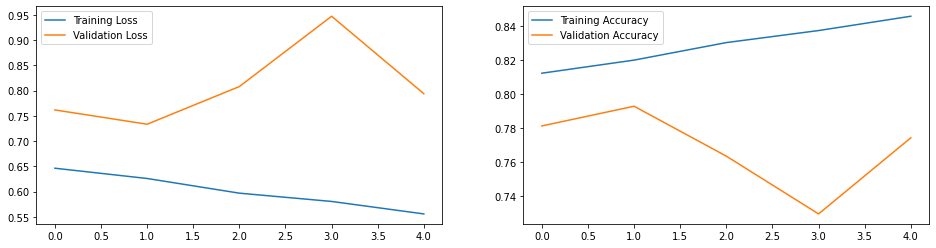

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

## Confusion matrices
Using both `sklearn.metrics`. Then we visualize the confusion matrix and see what that tells us.

In [ ]:
pred1= model.predict(x_test_norm)
pred1=np.argmax(pred1, axis=1)

In [ ]:
print_validation_report(y_test, pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.89      0.80      1000
           1       0.82      0.94      0.88      1000
           2       0.64      0.71      0.67      1000
           3       0.65      0.63      0.64      1000
           4       0.75      0.77      0.76      1000
           5       0.86      0.53      0.66      1000
           6       0.69      0.92      0.79      1000
           7       0.91      0.78      0.84      1000
           8       0.92      0.81      0.86      1000
           9       0.93      0.76      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.79      0.78      0.77     10000
weighted avg       0.79      0.78      0.77     10000

Accuracy Score: 0.7753
Root Mean Square Error: 1.9923855048659633


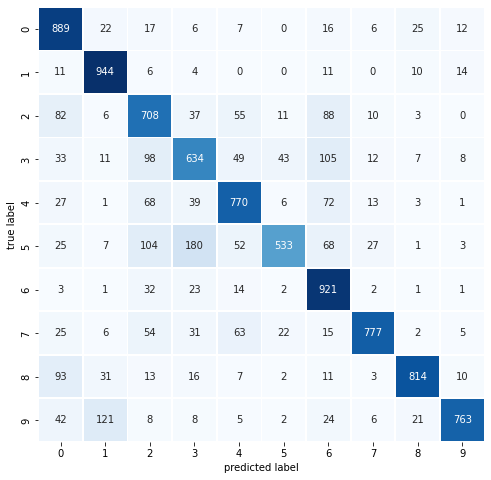

In [ ]:
plot_confusion_matrix(y_test,pred1)

### Load HDF5 Model Format 

<div class="alert alert-block alert-info">
<b>tf.keras.models.load_model</b><br>
https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model</div>

In [ ]:
model = tf.keras.models.load_model('/content/gdrive/My Drive/MSDS 458/models/model_0.7812.h5')

In [ ]:
preds = model.predict(x_test_norm)

In [ ]:
preds.shape

(10000, 10)

### Predictions

In [ ]:
cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [ ]:
df = pd.DataFrame(preds[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df.style.format("{:.2%}").background_gradient(cmap=cm)

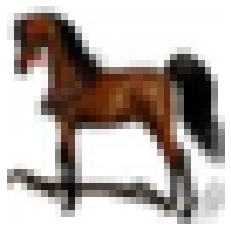

In [ ]:
(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[2004]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

In [38]:
# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [39]:
activations = activation_model.predict(img_tensor)
len(activations)

8

In [37]:
layer_names = []
for layer in model.layers:
    layer_names.append(layer.name)
    
layer_names

['conv2d_2',
 'max_pooling2d_2',
 'dropout',
 'conv2d_3',
 'max_pooling2d_3',
 'dropout_1',
 'conv2d_4',
 'max_pooling2d_4',
 'dropout_2',
 'flatten_1',
 'batch_normalization',
 'dense_2',
 'dense_3']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


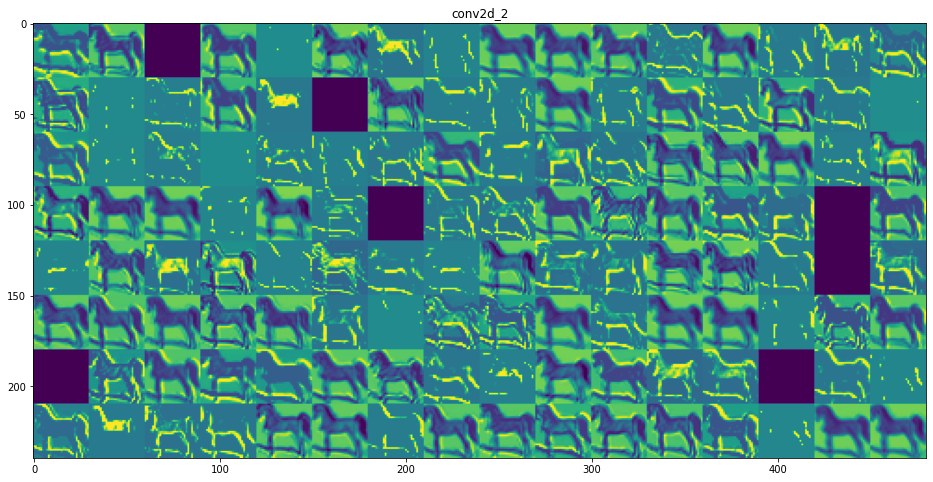

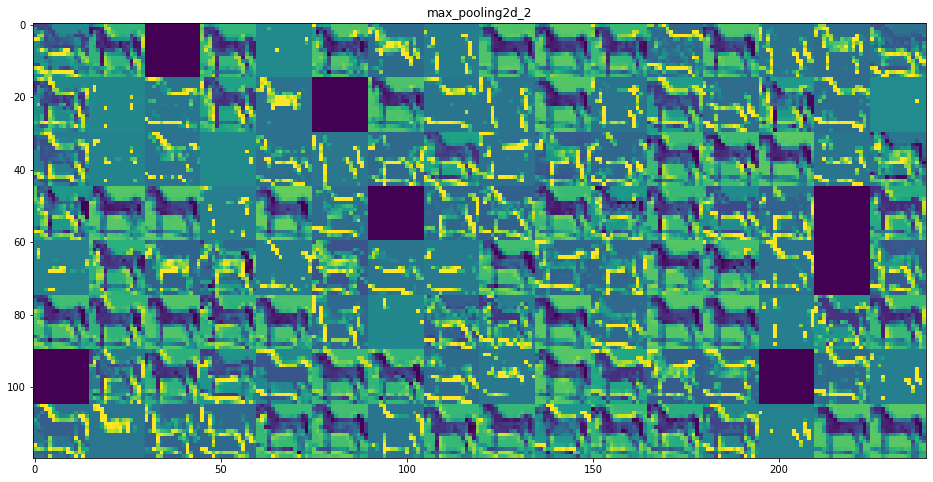

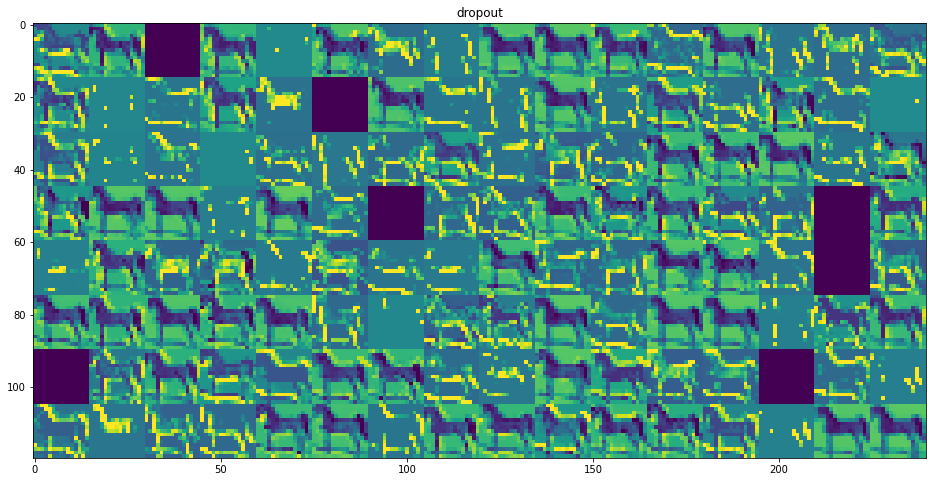

In [40]:
# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model.layers[:3]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show();

**Experiment 1: DNN with 2 layers (no regularization)**

In [ ]:
model1 = models.Sequential()
model1.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model1.add(layers.Dense(units=256, activation=tf.nn.relu))
model1.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               786688    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


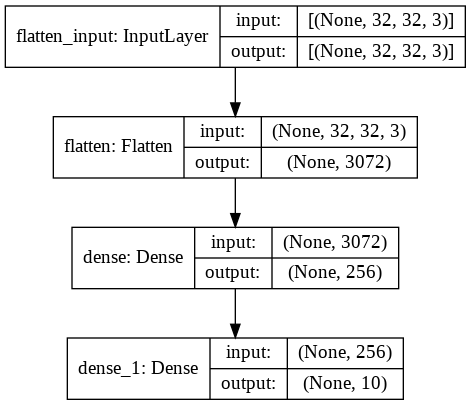

In [ ]:
keras.utils.plot_model(model1, "CIFAR10.png", show_shapes=True) 

In [ ]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time = datetime.datetime.now()
history1 = model1.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/MSDS 458/models/model1_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
end_time = datetime.datetime.now()

Epoch 1/200
88/88 [==============================] - 4s 9ms/step - loss: 2.1471 - accuracy: 0.2502 - val_loss: 1.9014 - val_accuracy: 0.3374
Epoch 2/200
88/88 [==============================] - 1s 7ms/step - loss: 1.8410 - accuracy: 0.3517 - val_loss: 1.8173 - val_accuracy: 0.3486
Epoch 3/200
88/88 [==============================] - 1s 7ms/step - loss: 1.7746 - accuracy: 0.3778 - val_loss: 1.7677 - val_accuracy: 0.3726
Epoch 4/200
88/88 [==============================] - 1s 7ms/step - loss: 1.7251 - accuracy: 0.3950 - val_loss: 1.7435 - val_accuracy: 0.3870
Epoch 5/200
88/88 [==============================] - 1s 8ms/step - loss: 1.6993 - accuracy: 0.4029 - val_loss: 1.7273 - val_accuracy: 0.3856
Epoch 6/200
88/88 [==============================] - 1s 7ms/step - loss: 1.6597 - accuracy: 0.4190 - val_loss: 1.6793 - val_accuracy: 0.3998
Epoch 7/200
88/88 [==============================] - 1s 7ms/step - loss: 1.6317 - accuracy: 0.4286 - val_loss: 1.6566 - val_accuracy: 0.4142
Epoch 8/200
8

In [ ]:
time_to_predict = end_time-start_time
print('total elapsed time to predict: ' + str(time_to_predict))

total elapsed time to predict: 0:00:19.668193


In [ ]:
loss, accuracy = model1.evaluate(x_test_norm, y_test)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 3ms/step - loss: 1.5309 - accuracy: 0.4556
test set accuracy:  45.55999934673309


In [ ]:
preds1 = model1.predict(x_test_norm)
print('shape of preds: ', preds1.shape)

shape of preds:  (10000, 10)


In [ ]:
# Plotting Performance Metrics

history_dict1 = history1.history
history_dict1.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history_df1=pd.DataFrame(history_dict1)
history_df1.tail().round(3)

loss  accuracy  val_loss  val_accuracy
16  1.509     0.469     1.580         0.437
17  1.495     0.475     1.574         0.447
18  1.489     0.477     1.578         0.441
19  1.478     0.480     1.577         0.436
20  1.473     0.478     1.561         0.446

In [ ]:
losses1 = history1.history['loss']
accs1 = history1.history['accuracy']
val_losses1 = history1.history['val_loss']
val_accs1 = history1.history['val_accuracy']
epochs1 = len(losses1)

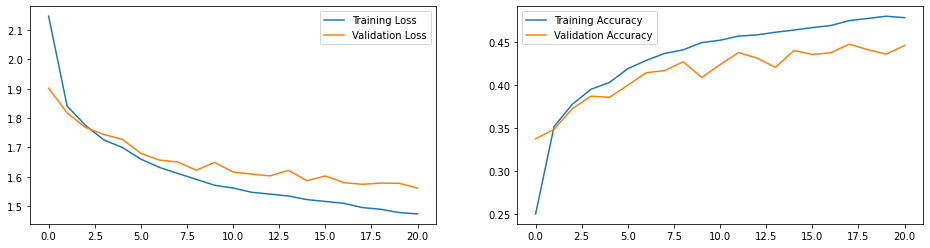

In [ ]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses1, accs1], [val_losses1, val_accs1], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs1), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs1), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [ ]:
# Confusion Matrix

pred1= model1.predict(x_test_norm)
pred1=np.argmax(pred1, axis=1)

In [ ]:
print_validation_report(y_test, pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.46      0.62      0.53      1000
           1       0.59      0.56      0.58      1000
           2       0.37      0.29      0.33      1000
           3       0.29      0.40      0.34      1000
           4       0.41      0.30      0.35      1000
           5       0.34      0.35      0.35      1000
           6       0.48      0.51      0.49      1000
           7       0.60      0.40      0.48      1000
           8       0.63      0.55      0.59      1000
           9       0.48      0.57      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.45     10000
weighted avg       0.47      0.46      0.45     10000

Accuracy Score: 0.4556
Root Mean Square Error: 3.242360251421794


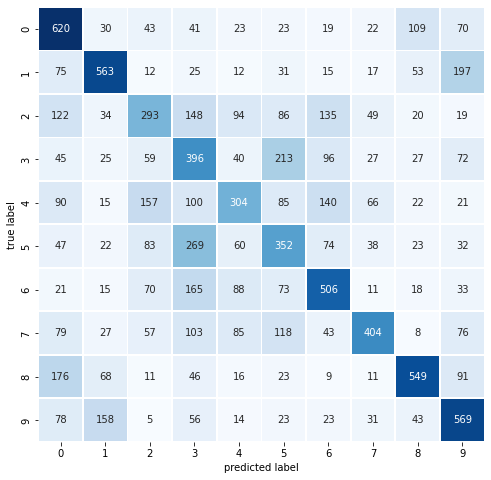

In [ ]:
plot_confusion_matrix(y_test,pred1)

In [ ]:
# TSNE Visualization

# Extracts the outputs of the layers:
layer_outputs = [layer.output for layer in model1.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model1.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 3 layers


In [ ]:
# Get the outputs of all the hidden nodes for each of the training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[1]
output_layer_activations = activations[2]
hidden_layer_activation.shape   #  each of the hidden nodes has one activation value per training image

(45000, 256)

In [ ]:
output_layer_activations.shape

(45000, 10)

In [ ]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 28.021331787109375


In [ ]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[2]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (45000, 10)
The output for the first image are [0.001 0.001 0.015 0.269 0.007 0.628 0.035 0.038 0.001 0.005]
The sum of the probabilities is (approximately) 1.0


In [ ]:
y_train_split.shape

(45000, 1)

In [ ]:
y_train_split = y_train_split.flatten()

In [ ]:
y_train_split.shape

(45000,)

In [ ]:
hidden_layer_activation.shape

(45000, 256)

In [ ]:
# Create a dataframe with activation values and class labels

#Get the dataframe of all the node values
activation_data = {'actual_class':y_train_split}
for k in range(0,256): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_data

{'act_val_0': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_1': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_10': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_100': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_101': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_102': array([0.481, 0.   , 0.   , ..., 6.856, 6.467, 5.267], dtype=float32),
 'act_val_103': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_104': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_105': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_106': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_107': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_108': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_109': array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
 'act_val_11': array([1.834, 0.   , 0.   , ..., 0.   , 0.   , 0.   ], dtype=float32),
 'ac

In [ ]:
activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

0    1    2    3    4    5   ...   9    10   11   12   13   14
actual_class  3.0  1.0  0.0  3.0  2.0  4.0  ...  5.0  0.0  7.0  6.0  4.0  7.0
act_val_0     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
act_val_1     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
act_val_2     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
act_val_3     0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
...           ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
act_val_251   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
act_val_252   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
act_val_253   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
act_val_254   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
act_val_255   0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0

[257 rows x 15 columns]

In [ ]:
# Separating out the features
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
x = activation_df.loc[:, features].values 


In [ ]:
activation_df.shape

(45000, 257)

In [ ]:
# Use only 1,000?

N=10000
activation_df_subset = activation_df.iloc[:N].copy()
activation_df_subset.shape

(10000, 257)

In [ ]:
x_train_norm.shape

(45000, 32, 32, 3)

In [ ]:
# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

x_train_norm = np.reshape(x_train_norm,(45000,3072))

In [ ]:
y_train_split.shape

(45000,)

In [ ]:
#Get the dataframe of all the pixel values
pixel_data = {'actual_class':y_train_split}
for k in range(0,256): 
    pixel_data[f"pix_val_{k}"] = x_train_norm[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

0      1      2      3   ...     11     12     13     14
actual_class  3.000  1.000  0.000  3.000  ...  7.000  6.000  4.000  7.000
pix_val_0     0.071  1.000  0.882  0.016  ...  0.482  0.000  0.455  0.039
pix_val_1     0.047  1.000  0.886  0.016  ...  0.584  0.000  0.545  0.133
pix_val_2     0.094  1.000  0.894  0.016  ...  0.694  0.000  0.271  0.188
pix_val_3     0.086  0.988  0.875  0.020  ...  0.494  0.004  0.282  0.051
...             ...    ...    ...    ...  ...    ...    ...    ...    ...
pix_val_251   0.565  0.788  0.890  0.024  ...  0.686  0.016  0.369  0.200
pix_val_252   0.392  0.800  0.886  0.031  ...  0.439  0.039  0.714  0.102
pix_val_253   0.447  0.820  0.890  0.031  ...  0.510  0.020  0.678  0.169
pix_val_254   0.553  0.831  0.894  0.031  ...  0.604  0.012  0.553  0.239
pix_val_255   0.373  0.855  0.886  0.031  ...  0.475  0.047  0.898  0.086

[257 rows x 15 columns]

In [ ]:
activation_df_subset.head()

actual_class  act_val_0  act_val_1  ...  act_val_253  act_val_254  act_val_255
0             3        0.0        0.0  ...          0.0          0.0          0.0
1             1        0.0        0.0  ...          0.0          0.0          0.0
2             0        0.0        0.0  ...          0.0          0.0          0.0
3             3        0.0        0.0  ...          0.0          0.0          0.0
4             2        0.0        0.0  ...          0.0          0.0          0.0

[5 rows x 257 columns]

In [ ]:
# Separating out the features
features = [*activation_data][1:] # ['pix_val_0', 'pix_val_1',...]
x = activation_df.loc[:, features].values 

In [ ]:
features

['act_val_0',
 'act_val_1',
 'act_val_2',
 'act_val_3',
 'act_val_4',
 'act_val_5',
 'act_val_6',
 'act_val_7',
 'act_val_8',
 'act_val_9',
 'act_val_10',
 'act_val_11',
 'act_val_12',
 'act_val_13',
 'act_val_14',
 'act_val_15',
 'act_val_16',
 'act_val_17',
 'act_val_18',
 'act_val_19',
 'act_val_20',
 'act_val_21',
 'act_val_22',
 'act_val_23',
 'act_val_24',
 'act_val_25',
 'act_val_26',
 'act_val_27',
 'act_val_28',
 'act_val_29',
 'act_val_30',
 'act_val_31',
 'act_val_32',
 'act_val_33',
 'act_val_34',
 'act_val_35',
 'act_val_36',
 'act_val_37',
 'act_val_38',
 'act_val_39',
 'act_val_40',
 'act_val_41',
 'act_val_42',
 'act_val_43',
 'act_val_44',
 'act_val_45',
 'act_val_46',
 'act_val_47',
 'act_val_48',
 'act_val_49',
 'act_val_50',
 'act_val_51',
 'act_val_52',
 'act_val_53',
 'act_val_54',
 'act_val_55',
 'act_val_56',
 'act_val_57',
 'act_val_58',
 'act_val_59',
 'act_val_60',
 'act_val_61',
 'act_val_62',
 'act_val_63',
 'act_val_64',
 'act_val_65',
 'act_val_66',
 'act

In [ ]:
data_subset = activation_df_subset[features].values
data_subset.shape

(10000, 256)

In [ ]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.336s...
[t-SNE] Computed neighbors for 10000 samples in 41.927s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.722501
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.971230
[t-SNE] KL divergence after 300 iterations: 3.319400
CPU times: user 1min 59s

In [ ]:
tsne_results = (tsne_results - tsne_results.min()) / (tsne_results.max() - tsne_results.min())


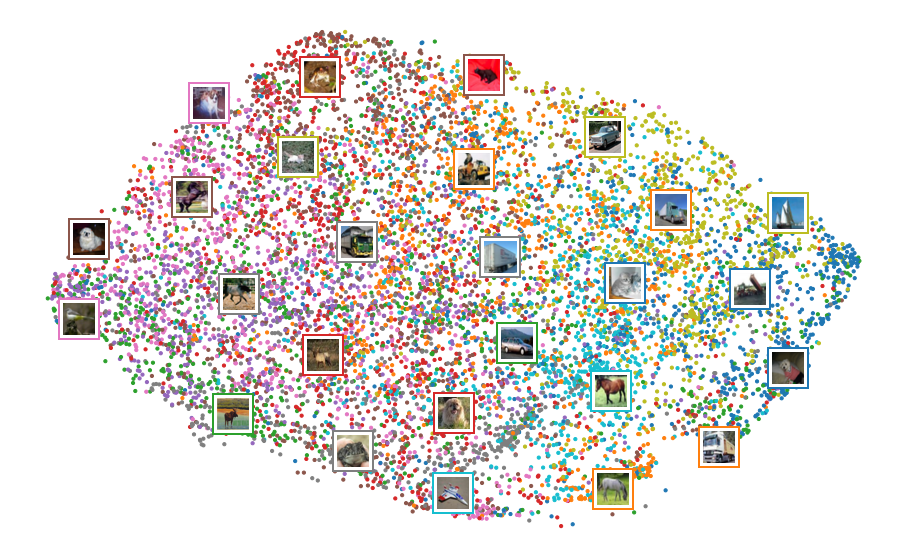

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
# plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=y_train_split[:N], s=10, cmap=cmap)

image_positions = np.array([[1., 1.]])
for index, position in enumerate(tsne_results):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_train[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_train_split[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

**Experiment 2: DNN with 3 layers (no regularization)**

In [ ]:
model2 = models.Sequential()
model2.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model2.add(layers.Dense(units=256, activation=tf.nn.relu))
model2.add(layers.Dense(units=512, activation=tf.nn.relu))
model2.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               786688    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 923,402
Trainable params: 923,402
Non-trainable params: 0
_________________________________________________________________


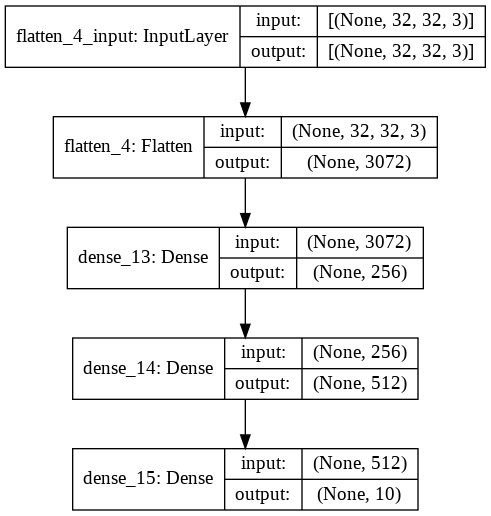

In [ ]:
keras.utils.plot_model(model2, "CIFAR10.png", show_shapes=True) 

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time = datetime.datetime.now()
history2 = model2.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/MSDS 458/models/model2_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
end_time = datetime.datetime.now()

Epoch 1/200
88/88 [==============================] - 4s 10ms/step - loss: 1.9842 - accuracy: 0.2852 - val_loss: 1.7915 - val_accuracy: 0.3650
Epoch 2/200
88/88 [==============================] - 1s 8ms/step - loss: 1.7342 - accuracy: 0.3809 - val_loss: 1.7090 - val_accuracy: 0.3886
Epoch 3/200
88/88 [==============================] - 1s 8ms/step - loss: 1.6422 - accuracy: 0.4159 - val_loss: 1.6238 - val_accuracy: 0.4252
Epoch 4/200
88/88 [==============================] - 1s 8ms/step - loss: 1.5903 - accuracy: 0.4348 - val_loss: 1.5942 - val_accuracy: 0.4374
Epoch 5/200
88/88 [==============================] - 1s 8ms/step - loss: 1.5430 - accuracy: 0.4550 - val_loss: 1.5767 - val_accuracy: 0.4432
Epoch 6/200
88/88 [==============================] - 1s 8ms/step - loss: 1.5009 - accuracy: 0.4701 - val_loss: 1.5444 - val_accuracy: 0.4542
Epoch 7/200
88/88 [==============================] - 1s 8ms/step - loss: 1.4727 - accuracy: 0.4776 - val_loss: 1.5566 - val_accuracy: 0.4448
Epoch 8/200


In [ ]:
time_to_predict = end_time-start_time
print('total elapsed time to predict: ' + str(time_to_predict))

total elapsed time to predict: 0:00:15.241903


In [ ]:
loss, accuracy = model2.evaluate(x_test_norm, y_test)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 3ms/step - loss: 1.4088 - accuracy: 0.5155
test set accuracy:  51.5500009059906


**Experiment 3: CNN with 2 layers (no regularization)**

In [9]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(32, 32, 3)))
model3.add(layers.MaxPool2D((2, 2),strides=2))
model3.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model3.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model3.add(layers.Flatten())
model3.add(layers.Dense(units=384, activation=tf.nn.relu))
model3.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [10]:
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 384)               3539328   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

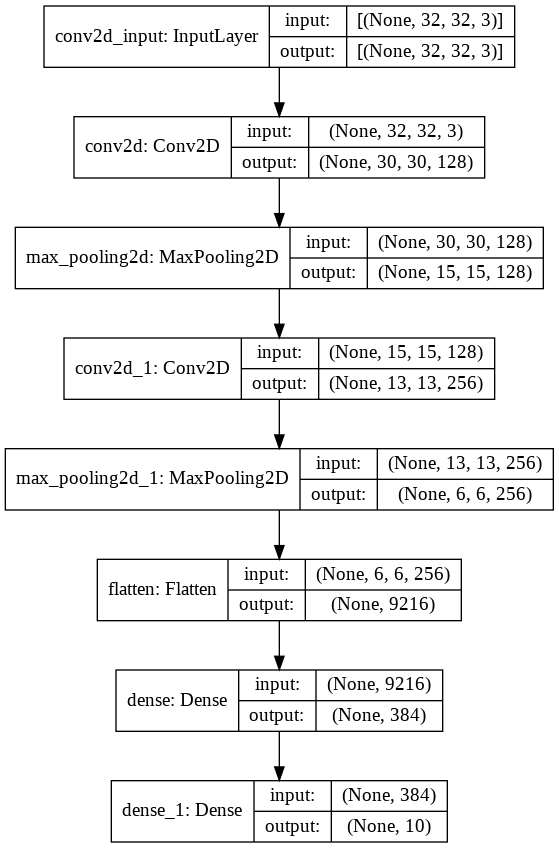

In [11]:
keras.utils.plot_model(model3, "CIFAR10.png", show_shapes=True) 

In [12]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
start_time = datetime.datetime.now()
history3 = model3.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/MSDS 458/models/model3_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
end_time = datetime.datetime.now()

Epoch 1/200
88/88 [==============================] - 42s 122ms/step - loss: 1.7061 - accuracy: 0.3876 - val_loss: 1.3708 - val_accuracy: 0.5116
Epoch 2/200
88/88 [==============================] - 8s 96ms/step - loss: 1.2731 - accuracy: 0.5529 - val_loss: 1.1802 - val_accuracy: 0.5874
Epoch 3/200
88/88 [==============================] - 8s 96ms/step - loss: 1.0964 - accuracy: 0.6152 - val_loss: 1.0426 - val_accuracy: 0.6294
Epoch 4/200
88/88 [==============================] - 9s 99ms/step - loss: 0.9852 - accuracy: 0.6595 - val_loss: 0.9907 - val_accuracy: 0.6512
Epoch 5/200
88/88 [==============================] - 8s 96ms/step - loss: 0.9036 - accuracy: 0.6868 - val_loss: 0.9510 - val_accuracy: 0.6644
Epoch 6/200
88/88 [==============================] - 8s 95ms/step - loss: 0.8537 - accuracy: 0.7073 - val_loss: 0.9000 - val_accuracy: 0.6880
Epoch 7/200
88/88 [==============================] - 8s 96ms/step - loss: 0.7859 - accuracy: 0.7306 - val_loss: 0.8880 - val_accuracy: 0.6916
Epoc

In [14]:
time_to_predict = end_time-start_time
print('total elapsed time to predict: ' + str(time_to_predict))

total elapsed time to predict: 0:03:01.367809


In [15]:
loss, accuracy = model3.evaluate(x_test_norm, y_test)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 2s 7ms/step - loss: 0.9171 - accuracy: 0.7260
test set accuracy:  72.60000109672546


In [16]:
# Predictions

preds3 = model3.predict(x_test_norm)
print('shape of preds: ', preds3.shape)

shape of preds:  (10000, 10)


In [17]:
# Plot Prediction Metrics

history3_dict = history3.history
history3_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
history3_df=pd.DataFrame(history3_dict)
history3_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
12  0.475     0.840     0.800         0.730
13  0.419     0.861     0.819         0.733
14  0.374     0.877     0.848         0.728
15  0.328     0.893     0.878         0.731
16  0.272     0.914     0.892         0.726

In [19]:
losses3 = history3.history['loss']
accs3 = history3.history['accuracy']
val_losses3 = history3.history['val_loss']
val_accs3 = history3.history['val_accuracy']
epochs3 = len(losses3)

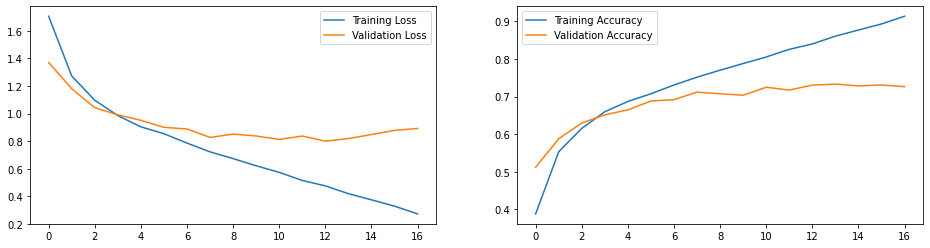

In [20]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses3, accs3], [val_losses3, val_accs3], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs3), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs3), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [21]:
# Connfusion Matrix

pred3= model3.predict(x_test_norm)
pred3=np.argmax(pred3, axis=1)

In [22]:
print_validation_report(y_test, pred3)

Classification Report
              precision    recall  f1-score   support

           0       0.78      0.74      0.76      1000
           1       0.84      0.82      0.83      1000
           2       0.70      0.57      0.63      1000
           3       0.54      0.53      0.53      1000
           4       0.62      0.77      0.69      1000
           5       0.61      0.68      0.64      1000
           6       0.90      0.72      0.80      1000
           7       0.77      0.77      0.77      1000
           8       0.76      0.87      0.81      1000
           9       0.81      0.78      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

Accuracy Score: 0.726
Root Mean Square Error: 2.1630071659613153


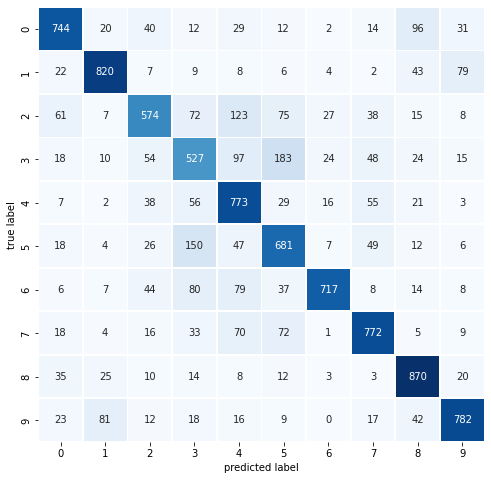

In [23]:
plot_confusion_matrix(y_test,pred3)

In [ ]:
# Load hdf5 model format

model3 = tf.keras.models.load_model('/content/gdrive/My Drive/MSDS 458/models/model3_0.7650.h5')

In [24]:
preds3 = model3.predict(x_test_norm)

In [ ]:
preds3.shape

(10000, 10)

In [25]:
# Predictions

cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)

In [26]:
df3 = pd.DataFrame(preds3[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df3.style.format("{:.2%}").background_gradient(cmap=cm)

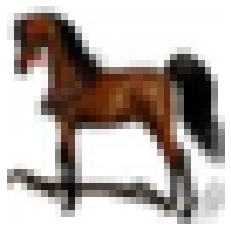

In [42]:
(_,_), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

img = test_images[2004]
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)

class_names = ['airplane'
,'automobile'
,'bird'
,'cat'
,'deer'
,'dog'
,'frog' 
,'horse'
,'ship'
,'truck']

plt.imshow(img, cmap='viridis')
plt.axis('off')
plt.show()

In [43]:
# Extracts the outputs of the top 8 layers:
layer_outputs3 = [layer.output for layer in model3.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model3 = models.Model(inputs=model3.input, outputs=layer_outputs)

ValueError: ignored

In [ ]:
activations3 = activation_model3.predict(img_tensor)
len(activations3)

8

In [ ]:
layer_names3 = []
for layer in model3.layers:
    layer_names3.append(layer.name)
    
layer_names3

['conv2d_2',
 'max_pooling2d_2',
 'conv2d_3',
 'max_pooling2d_3',
 'flatten_1',
 'batch_normalization_1',
 'dense_7',
 'dense_8']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


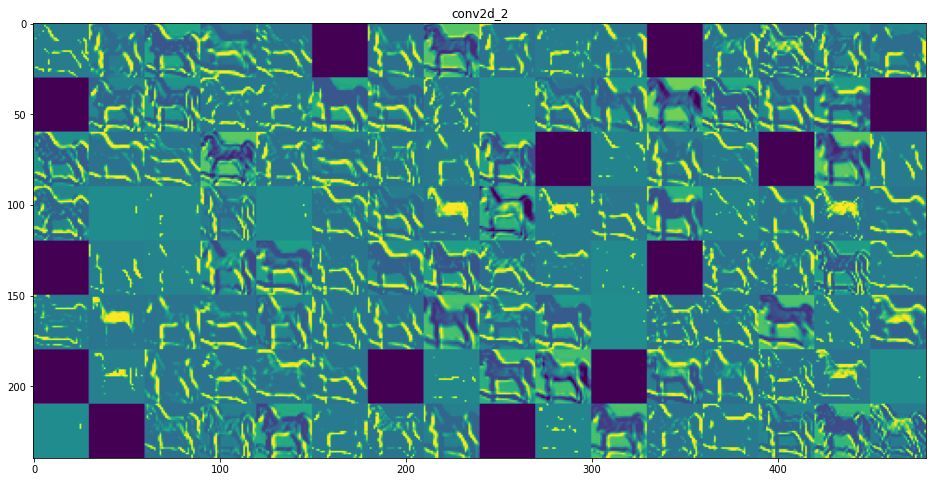

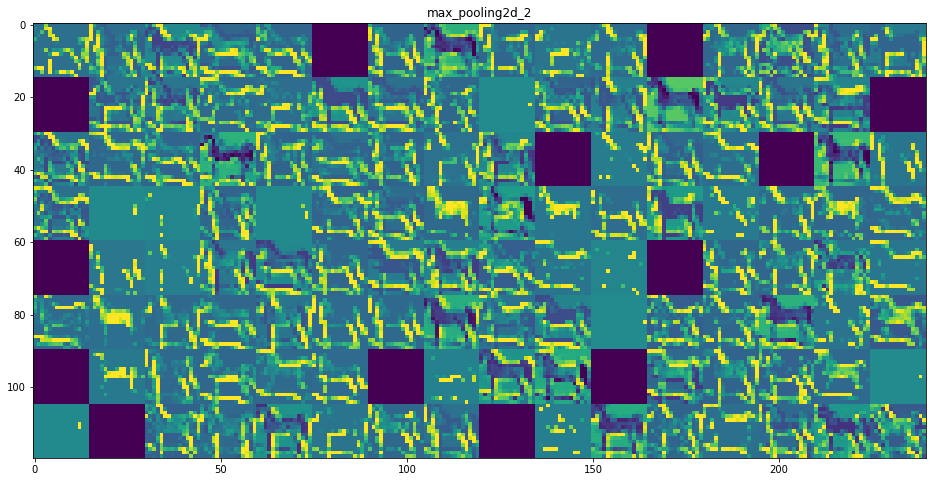

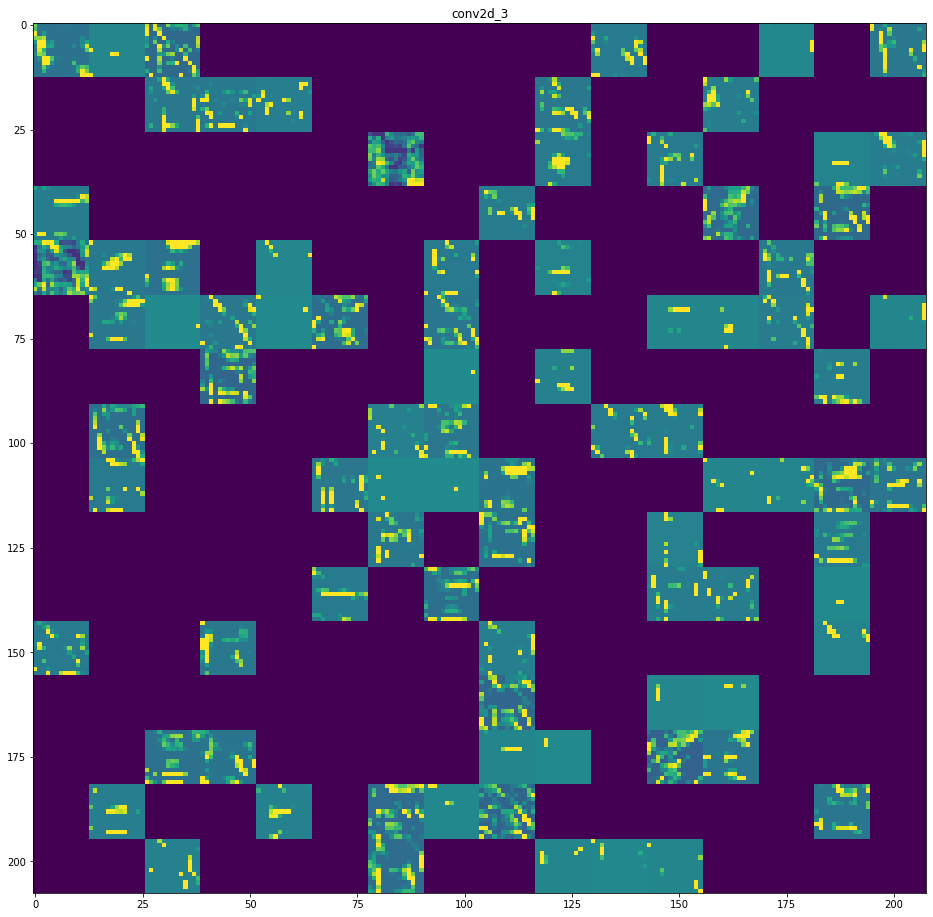

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names3 = []
for layer in model3.layers[:3]:
    layer_names3.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation3 in zip(layer_names3, activations3):
    # This is the number of features in the feature map
    n_features = layer_activation3.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation3.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation3[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show();

**Experiment 4: CNN with 3 layers (no regularization)**

In [44]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model4.add(layers.MaxPool2D((2, 2),strides=2))
model4.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4.add(layers.Flatten())
model4.add(layers.Dense(units=384, activation=tf.nn.relu))
model4.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [45]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 128)       3584      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 256)       295168    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 512)         1180160   
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 512)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)             

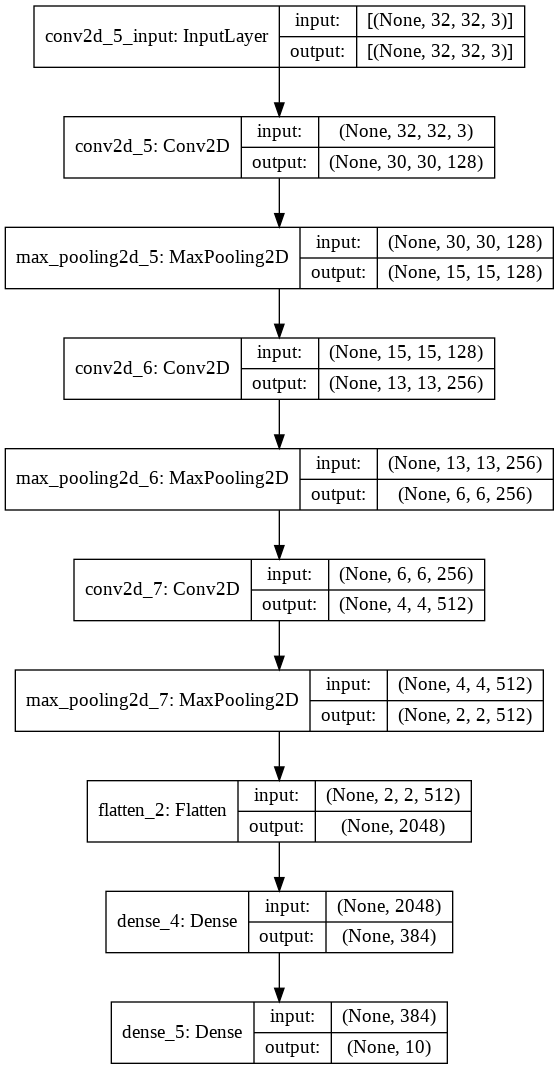

In [46]:
keras.utils.plot_model(model4, "CIFAR10.png", show_shapes=True) 

In [47]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [48]:
start_time = datetime.datetime.now()
history4 = model4.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/MSDS 458/models/model4_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
end_time = datetime.datetime.now()

Epoch 1/200
88/88 [==============================] - 14s 136ms/step - loss: 1.8097 - accuracy: 0.3324 - val_loss: 1.4714 - val_accuracy: 0.4576
Epoch 2/200
88/88 [==============================] - 11s 119ms/step - loss: 1.3429 - accuracy: 0.5163 - val_loss: 1.2251 - val_accuracy: 0.5540
Epoch 3/200
88/88 [==============================] - 10s 119ms/step - loss: 1.1510 - accuracy: 0.5943 - val_loss: 1.0855 - val_accuracy: 0.6172
Epoch 4/200
88/88 [==============================] - 10s 119ms/step - loss: 1.0030 - accuracy: 0.6510 - val_loss: 1.0137 - val_accuracy: 0.6412
Epoch 5/200
88/88 [==============================] - 10s 119ms/step - loss: 0.8993 - accuracy: 0.6903 - val_loss: 0.8869 - val_accuracy: 0.6928
Epoch 6/200
88/88 [==============================] - 10s 119ms/step - loss: 0.8106 - accuracy: 0.7201 - val_loss: 0.8460 - val_accuracy: 0.7074
Epoch 7/200
88/88 [==============================] - 10s 119ms/step - loss: 0.7272 - accuracy: 0.7488 - val_loss: 0.7940 - val_accuracy:

In [49]:
time_to_predict = end_time-start_time
print('total elapsed time to predict: ' + str(time_to_predict))

total elapsed time to predict: 0:02:43.172641


In [51]:
loss, accuracy = model4.evaluate(x_test_norm, y_test)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 3s 8ms/step - loss: 0.9439 - accuracy: 0.7312
test set accuracy:  73.11999797821045


In [52]:
# Predictions

preds4 = model4.predict(x_test_norm)
print('shape of preds: ', preds4.shape)

shape of preds:  (10000, 10)


In [53]:
# Plot Prediction Metrics

history4_dict = history4.history
history4_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
history4_df=pd.DataFrame(history4_dict)
history4_df.tail().round(3)

loss  accuracy  val_loss  val_accuracy
10  0.485     0.834     0.785         0.736
11  0.426     0.854     0.764         0.750
12  0.361     0.878     0.807         0.741
13  0.307     0.897     0.797         0.744
14  0.253     0.917     0.888         0.736

In [55]:
losses4 = history4.history['loss']
accs4 = history4.history['accuracy']
val_losses4 = history4.history['val_loss']
val_accs4 = history4.history['val_accuracy']
epochs4 = len(losses4)

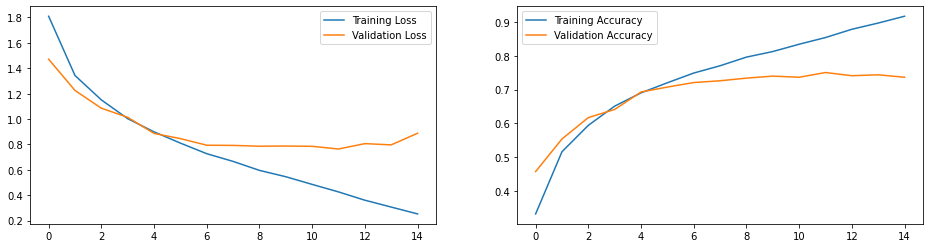

In [56]:
plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses4, accs4], [val_losses4, val_accs4], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs4), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs4), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [57]:
# Connfusion Matrix

pred4 = model4.predict(x_test_norm)
pred4 =np.argmax(pred4, axis=1)

In [58]:
print_validation_report(y_test, pred4)

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.81      0.77      1000
           1       0.85      0.84      0.85      1000
           2       0.57      0.70      0.63      1000
           3       0.58      0.57      0.58      1000
           4       0.85      0.46      0.60      1000
           5       0.71      0.59      0.64      1000
           6       0.80      0.80      0.80      1000
           7       0.69      0.83      0.75      1000
           8       0.80      0.88      0.84      1000
           9       0.79      0.83      0.81      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.73     10000
weighted avg       0.74      0.73      0.73     10000

Accuracy Score: 0.7312
Root Mean Square Error: 2.1789676454688354


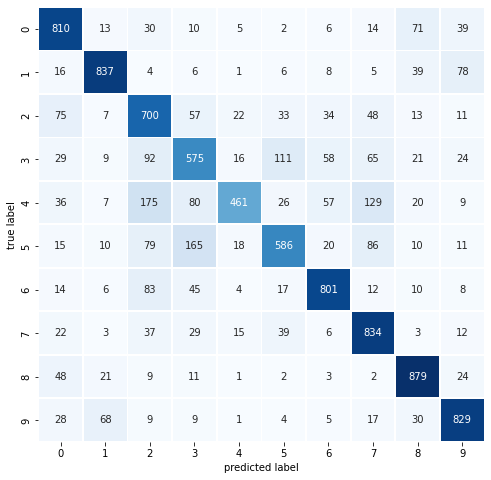

In [59]:
plot_confusion_matrix(y_test,pred4)

In [ ]:
# Load hdf5 model format

model4 = tf.keras.models.load_model('/content/gdrive/My Drive/MSDS 458/models/model4_0.7836.h5')

In [60]:
preds4 = model4.predict(x_test_norm)

In [61]:
# Predictions

df4 = pd.DataFrame(preds4[0:20], columns = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
df4.style.format("{:.2%}").background_gradient(cmap=cm)

In [ ]:
# Extracts the outputs of the top 8 layers:
layer_outputs4 = [layer.output for layer in model4.layers[:8]]
# Creates a model that will return these outputs, given the model input:
activation_model4 = models.Model(inputs=model4.input, outputs=layer_outputs4)

In [ ]:
activations4 = activation_model4.predict(img_tensor)
len(activations4)

8

In [ ]:
layer_names4 = []
for layer in model4.layers:
    layer_names4.append(layer.name)
    
layer_names4

['conv2d_4',
 'max_pooling2d_4',
 'conv2d_5',
 'max_pooling2d_5',
 'conv2d_6',
 'max_pooling2d_6',
 'flatten_2',
 'batch_normalization_2',
 'dense_9',
 'dense_10']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


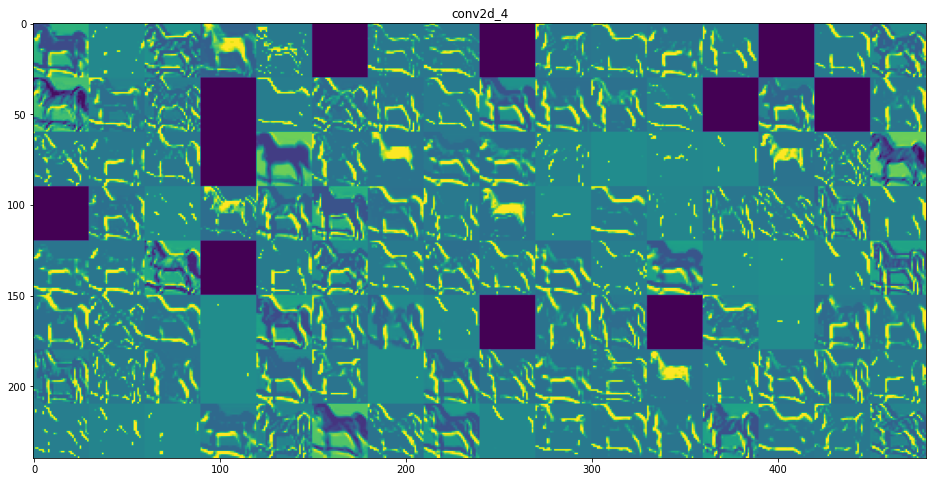

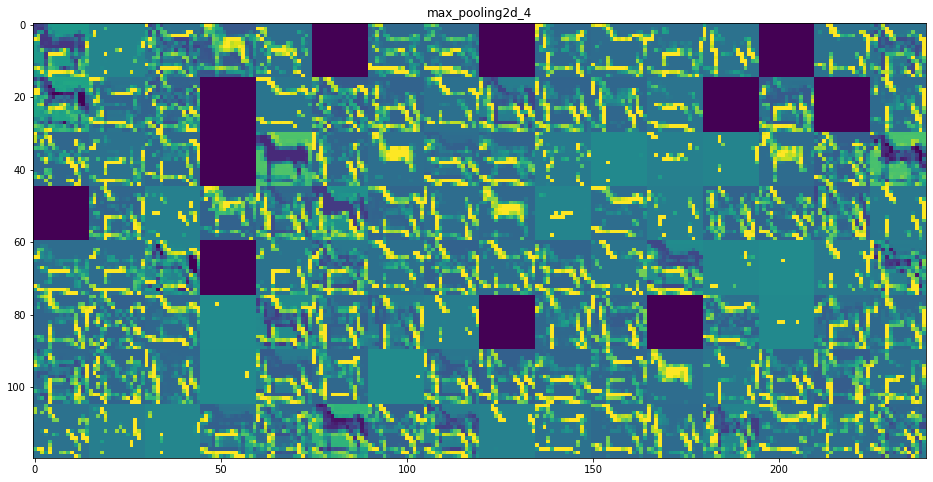

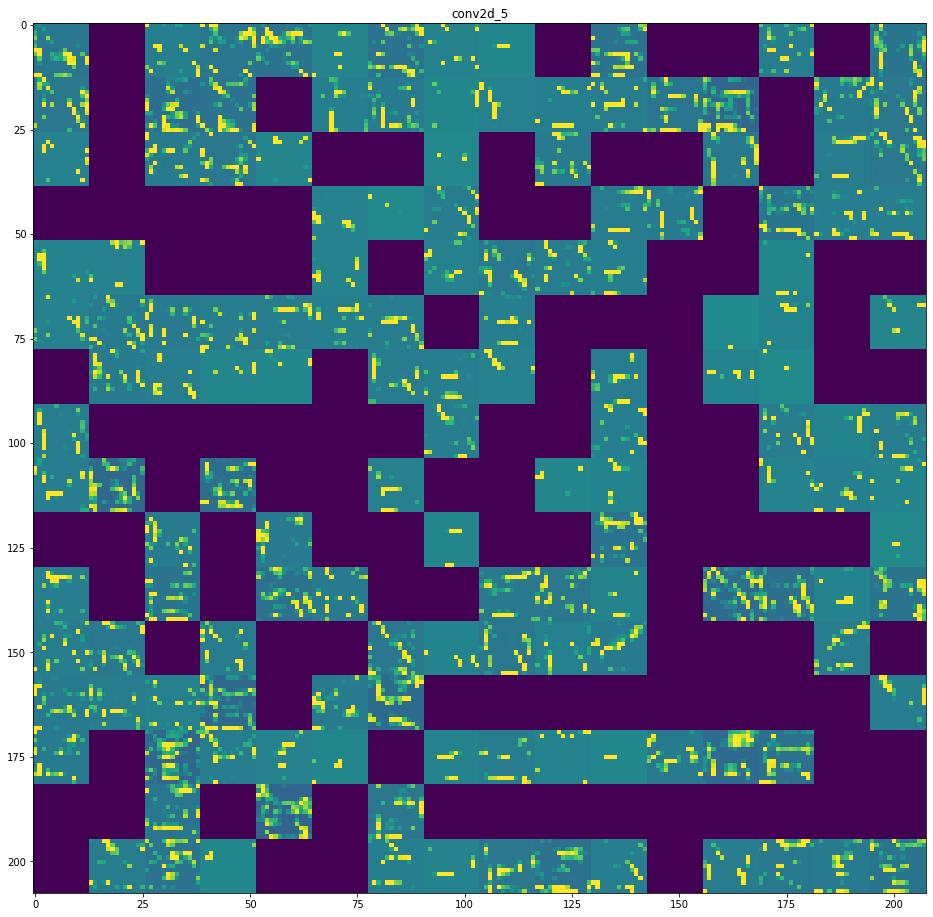

In [ ]:
# These are the names of the layers, so can have them as part of our plot
layer_names4 = []
for layer in model4.layers[:3]:
    layer_names4.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation4 in zip(layer_names4, activations4):
    # This is the number of features in the feature map
    n_features = layer_activation4.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation4.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation4[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show();

Experiment 4b


In [ ]:
model4b = models.Sequential()
model4b.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model4b.add(layers.MaxPool2D((2, 2),strides=2))
model4b.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4b.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4b.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4b.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model4b.add(layers.Flatten())
model4b.add(layers.BatchNormalization())
model4b.add(layers.Dense(units=384, activation=tf.nn.relu))
model4b.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [ ]:
model4b.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 512)       14336     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 512)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 256)       1179904   
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         295040    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [ ]:
model4b.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
start_time = datetime.datetime.now()
history4b = model4b.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/MSDS 458/models/model4b_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )
end_time = datetime.datetime.now()

Epoch 1/200
88/88 [==============================] - 66s 349ms/step - loss: 1.4635 - accuracy: 0.4761 - val_loss: 1.9593 - val_accuracy: 0.3552
Epoch 2/200
88/88 [==============================] - 23s 265ms/step - loss: 1.0530 - accuracy: 0.6322 - val_loss: 1.6879 - val_accuracy: 0.4414
Epoch 3/200
88/88 [==============================] - 23s 263ms/step - loss: 0.8862 - accuracy: 0.6932 - val_loss: 1.3692 - val_accuracy: 0.5656
Epoch 4/200
88/88 [==============================] - 23s 263ms/step - loss: 0.7670 - accuracy: 0.7328 - val_loss: 1.1540 - val_accuracy: 0.6076
Epoch 5/200
88/88 [==============================] - 23s 264ms/step - loss: 0.6777 - accuracy: 0.7673 - val_loss: 1.1624 - val_accuracy: 0.5820
Epoch 6/200
88/88 [==============================] - 23s 263ms/step - loss: 0.6093 - accuracy: 0.7916 - val_loss: 1.2045 - val_accuracy: 0.5980
Epoch 7/200
88/88 [==============================] - 23s 261ms/step - loss: 0.5434 - accuracy: 0.8146 - val_loss: 1.3690 - val_accuracy:

In [ ]:
time_to_predict = end_time-start_time
print('total elapsed time to predict: ' + str(time_to_predict))

total elapsed time to predict: 0:03:26.860555


In [ ]:
loss, accuracy = model4b.evaluate(x_test_norm, y_test)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 4s 12ms/step - loss: 1.3703 - accuracy: 0.5779
test set accuracy:  57.78999924659729
